In [136]:
%pylab
%matplotlib inline 
import pandas as pd
import pyecharts
import seaborn as sns
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set()
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [137]:
AR = pd.read_csv('./data/2018各省市年龄与抚养比.csv')
GDP = pd.read_csv('./data/2018各省市生产总值.csv')
GDP_T = pd.read_csv('./data/1978-2018生产总值.csv')
MT = pd.read_csv('./data/med.csv') # 医疗水平
ED = pd.read_csv('./data/edu.csv') # 教育水平
UAR = pd.read_csv('./data/2010-2018各省市城市人口比重.csv')
SEX = pd.read_csv('./data/2018各省市性别比例.csv')
IN = pd.read_csv('./data/2018各省市工业化水平.csv')
AS = pd.read_csv('./data/2018年龄段性别比例.csv')
AS_T = pd.read_csv('./data/1982-2018年龄结构.csv')
SU = pd.read_csv('./data/1949-2018性别城乡分布.csv')

In [138]:
AS_T.head()

,年份,0-14岁比重,15-64岁比重,65岁及以上比重
0,1982,33.59,61.50,4.91
1,1987,28.68,65.86,5.40
2,1990,27.69,66.74,5.57
3,1991,27.71,66.30,5.99
4,1992,27.60,66.24,6.16


In [139]:
# 展示数据
for df in [AR, GDP, MT, ED, UAR, SEX, IN, AS, SU, GDP_T]:
    display(df.head(2))

,地区,人口数,0-14岁,15-64岁,65岁及以上,总抚养比,少年儿童抚养比,老年人口抚养比,老龄化比率
0,全国,1144648,192963,815039,136645.26,40.44,23.68,16.77,0.119378
1,北京,17673,1850,13834,1988.79,27.75,13.37,14.38,0.112533


,地区,生产总值,总值第一产业,总值第二产业,总值第三产业,人均地区生产总值,人均总值第一产业,人均总值第二产业,人均总值第三产业,地区生产总值指数,第一产业指数,第二产业指数,第三产业指数,人均地区生产总值.1
0,北 京,30319.98,118.69,5647.65,24553.64,140211.241878,0.39,18.63,80.98,106.6,97.7,104.2,107.3,107.093618
1,天 津,18809.64,172.71,7609.81,11027.12,120710.801930,0.92,40.46,58.62,103.6,100.1,101.0,105.9,103.710112


,地区,人口集聚度,基层医疗机构数(张),卫生机构集聚度,卫生机构比值,床位数(张),床位数集聚度,床位数比值
0,江苏,5.464,29099.0,2.967,0.54,77546.0,5.150,0.95
1,山东,4.533,72904.0,4.960,1.11,115017.0,5.096,1.14


,地区,发展指数2017,发展指数19年版,创新指数2017,创新指数19年版,绿色指数2017,绿色指数19年版,综合指数2017,综合指数19年版
0,全国,5.51,5.51,3.31,3.24,8.51,8.59,5.62,5.62
1,北京,10.00,10.00,10.00,10.00,9.93,10.00,10.00,10.00


,地区,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,全 国,49.950000,51.27,52.57,53.73,54.77,56.1,57.35,58.52,59.58
1,北 京,85.959455,86.20,86.20,86.30,86.35,86.5,86.50,86.50,86.50


,地区,合计,男,女
0,全 国,1144648,585299,559349
1,北 京,17673,8781,8892


,地区,工业化综合指数
0,北京,100
1,天津,100


,年龄段,人口总数,男,女
0,总计,1144648,585299,559349
1,0-4,67393,35887,31506


,年份,总人口(年末),男性人口数,男性比重,女性人口数,女性比重,城镇人口数,城镇比重,乡村人口数,乡村比重
0,1949,54167,28145.0,51.959680,26022.0,48.040320,5765,10.643011,48402,89.356989
1,1950,55196,28669.0,51.940358,26527.0,48.059642,6169,11.176535,49027,88.823465


,年份,总值
0,1978,3593.0
1,1979,3865.8


In [140]:
def get_data(log=False):
    '''提取数据'''
    data = AS_T.iloc[12:, 0] # 从 2000 年开始统计
    for df in [GDP_T, 
               SU[['年份', '男性比重','女性比重',  '城镇比重', '乡村比重']], 
               AS_T[['年份', '65岁及以上比重']]
              ]:
        data = pd.merge(data, df, on='年份', how='left')
    # data[[ '男性比重','女性比重',  '城镇比重', '乡村比重', '65岁及以上比重']]
    data.columns = ['年份', 'GDP', '男性比重','女性比重',  '城镇比重', '乡村比重', '65岁及以上比重']
    data['GDP'] = data['GDP'].map(lambda x: np.log(x))
    if log==True:
        data = data.apply(lambda x: np.log(x))
    data.set_index('年份')
    data = data.iloc[: ,[0, 1, 3, 4, -1]]
    return data

data = get_data()
data.head()

,年份,GDP,女性比重,城镇比重,65岁及以上比重
0,2000,10.837357,48.370000,36.220000,6.96
1,2000,11.515723,48.370000,36.220000,6.96
2,2001,11.595788,48.543803,37.660000,7.10
3,2002,11.683190,48.529812,39.089784,7.30
4,2003,11.778846,48.496831,40.530230,7.50


In [141]:
# 查看相关性
data.iloc[:, 1:].corr()['65岁及以上比重'].to_frame()

,65岁及以上比重
GDP,0.944120
女性比重,0.927944
城镇比重,0.974475
65岁及以上比重,1.000000


<AxesSubplot:>

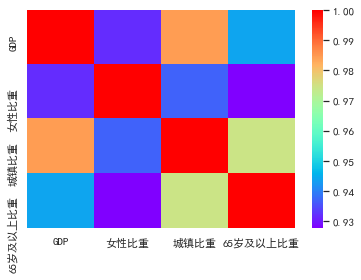

In [142]:
# 可视化相关性
sns.heatmap(data.iloc[:, 1:].corr(), cmap='rainbow')

In [143]:
'''灰度预测模型'''
class GM():
    def __init__(self, params=None):
        self.params = params
    
    def fit(self, X):
        self.X = X
        X_cumsum = np.cumsum(X)
        Z = - (X_cumsum[1:] + X_cumsum[:-1]) / 2
        Y = X[1:]
        B = np.array([Z, np.ones(len(Z))]).T
        self.a, self.b = np.dot(np.dot( np.linalg.inv(np.dot(B.T, B)), B.T), Y)
        
    def transform(self):
        res = []
        X = self.X
        res.append(X[0])
        a, b = self.a, self.b
        for k in range(1, len(self.X)):
            tmp = (X[0] - b / a) * np.exp(-a * k) + b / a
            res.append(tmp)
        res = np.array(res)
        X[1:] = res[1:] + res[0:-1]
        return X
    
    def predict(self, length=0):
        pred = [0]*length
        res = []
        a, b = self.a, self.b
        for k in range(len(self.X)- 1, len(self.X) + length):
            tmp = (self.X[0] - b / a) * np.exp(-a * k) + b / a
            res.append(tmp)
        res = np.array(res)
        pred = res[1:] - res[0:-1]
        return pred
        

In [175]:
def get_result(data, split_index = 16):
    X_train, y_train, X_test, y_test = data.iloc[:split_index, :-1].values, data.iloc[:split_index, -1].values, \
    data.iloc[split_index:, :-1].values, data.iloc[split_index:, -1].values
    gm = GM()
    N = len(X_test)

    res = []
    for i in range(3):
        X = X_test[:, i]
        gm.fit(X_train[:, i])
        X_pred = gm.predict(N)
        resi = X - X_pred
        relative_error = abs(resi) / X
        std = np.ones(len(X_pred))
        std[1:] = X_pred[:-1] / X_pred[1:]
        df = pd.DataFrame({
            '年份':data.iloc[split_index:, 0], 
            '原始值': X,
            '预测值': X_pred,
            '残差': resi,
            '相对误差': [str(round(x * 100, 2)) + '%' for x in relative_error],
            '级比偏差': 1 - std
        })
        print(data.columns[1+i])
        display(df)
        print()
        print()
        print()
        res.append(df)
    return res
res = get_result(data)


GDP


,年份,原始值,预测值,残差,相对误差,级比偏差
16,2013,2013.0,2012.921889,0.078111,0.0%,0.000000
17,2014,2014.0,2013.764122,0.235878,0.01%,0.000418
18,2015,2015.0,2014.606707,0.393293,0.02%,0.000418
19,2015,2015.0,2015.449645,-0.449645,0.02%,0.000418
20,2016,2016.0,2016.292936,-0.292936,0.01%,0.000418
21,2017,2017.0,2017.136579,-0.136579,0.01%,0.000418
22,2018,2018.0,2017.980575,0.019425,0.0%,0.000418





女性比重


,年份,原始值,预测值,残差,相对误差,级比偏差
16,2013,13.170778,13.230797,-0.060018,0.46%,0.000000
17,2014,13.241246,13.357886,-0.116640,0.88%,0.009514
18,2015,13.308022,13.486196,-0.178174,1.34%,0.009514
19,2015,13.438623,13.615739,-0.177117,1.32%,0.009514
20,2016,13.503796,13.746526,-0.242730,1.8%,0.009514
21,2017,13.569180,13.878569,-0.309390,2.28%,0.009514
22,2018,13.632788,14.011881,-0.379093,2.78%,0.009514





城镇比重


,年份,原始值,预测值,残差,相对误差,级比偏差
16,2013,48.760000,48.735296,0.024704,0.05%,0.000000
17,2014,48.770000,48.757422,0.012578,0.03%,0.000454
18,2015,48.775662,48.779558,-0.003896,0.01%,0.000454
19,2015,48.775662,48.801704,-0.026043,0.05%,0.000454
20,2016,48.790000,48.823860,-0.033860,0.07%,0.000454
21,2017,48.830000,48.846027,-0.016027,0.03%,0.000454
22,2018,48.866259,48.868203,-0.001944,0.0%,0.000454


In [146]:
colors = ['red', 'blue', 'green']

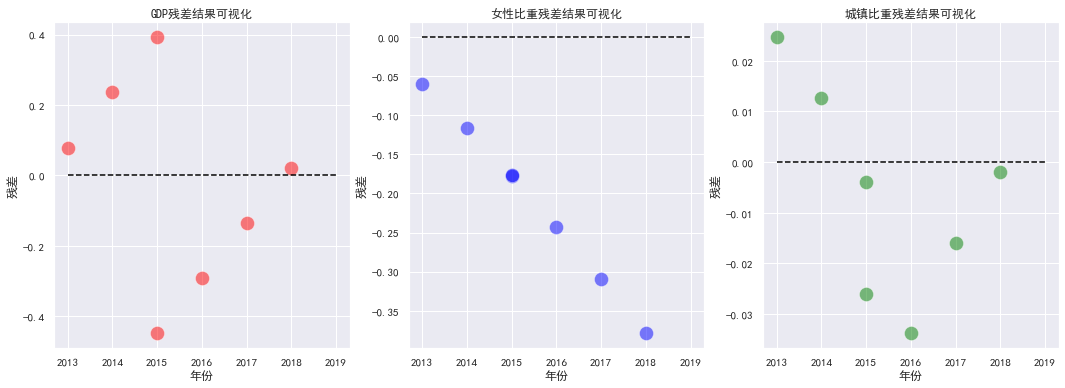

In [147]:
plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(131 + i)
    plt.plot(np.arange(len(x)) + 2013, np.zeros(len(x)), '--', color='black')
    sns.scatterplot(x='年份', y='残差', data=res[i], color=colors[i], s=200, alpha=0.5)
    plt.title(data.columns[1+i] + '残差结果可视化')
plt.show()

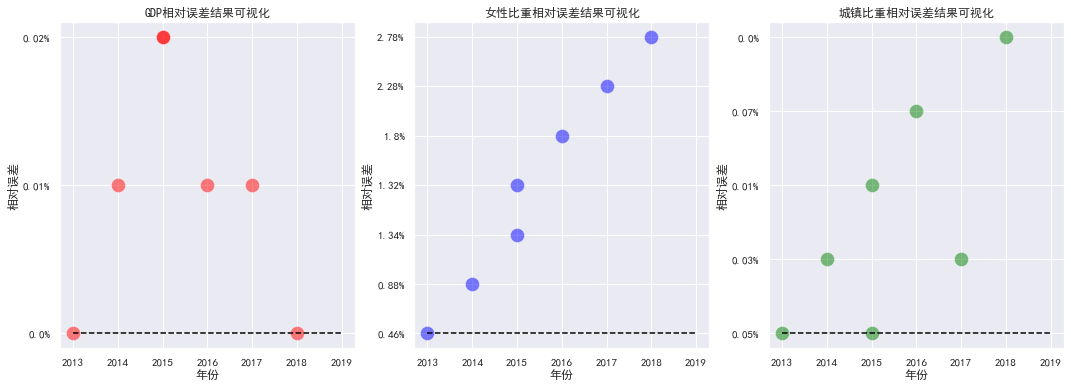

In [148]:
plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(131 + i)
    plt.plot(np.arange(len(x)) + 2013, np.zeros(len(x)), '--', color='black')
    sns.scatterplot(x='年份', y='相对误差', data=res[i], color=colors[i], s=200, alpha=0.5)
    plt.title(data.columns[1+i] + '相对误差结果可视化')
plt.show()

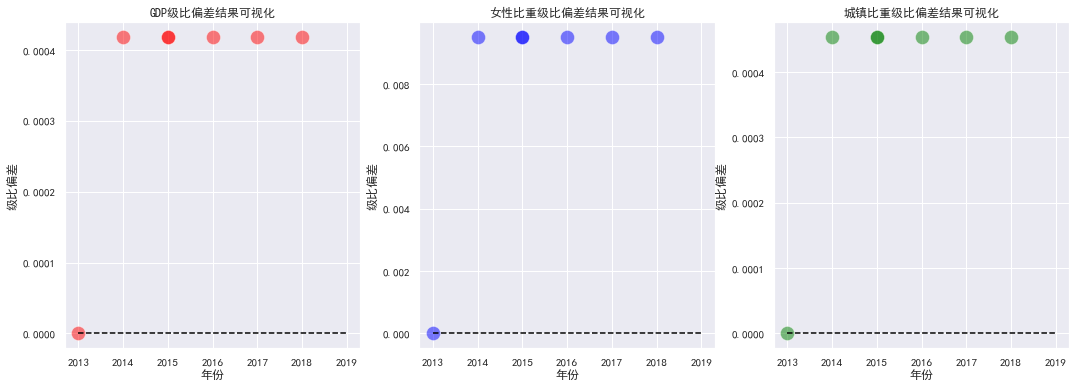

In [149]:
plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(131 + i)
    plt.plot(np.arange(len(x)) + 2013, np.zeros(len(x)), '--', color='black')
    sns.scatterplot(x='年份', y='级比偏差', data=res[i], color=colors[i], s=200, alpha=0.5)
    plt.title(data.columns[1+i] + '级比偏差结果可视化')
plt.show()

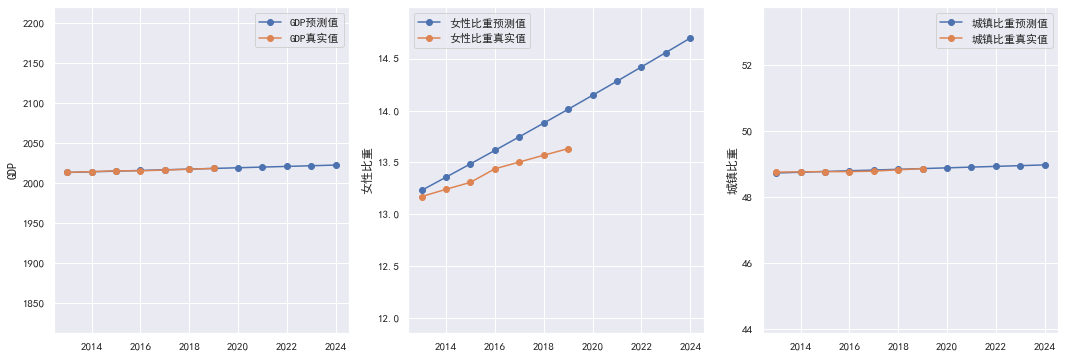

In [145]:
# 拟合并可视化(seaborn 版本), 预测未来5年
X_train, y_train, X_test, y_test = data.iloc[:split_index, :-1].values, data.iloc[:split_index, -1].values, \
    data.iloc[split_index:, :-1].values, data.iloc[split_index:, -1].values
gm = GM()

X_label = ['年份']*3
Y_label = data.columns[1:]

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(131 + i)
    N = len(X_test) + 5 # 预测年分数
    XX = np.arange(N) + 2013
    gm.fit(X_train[:, i])
    plt.plot(XX, gm.predict(N), '-o',  label=Y_label[i] + '预测值')
    plt.plot(np.arange(len(X_test)) + 2013, X_test[:, i], '-o', label=Y_label[i] + '真实值')
    plt.ylim(X_test[:, i].min()*0.9, X_test[:, i].max()*1.1)
    plt.legend()
    plt.ylabel(Y_label[i])
plt.show()

-65.90259332012401
[-1.03973338  1.53772221  0.2711264 ]


'2000-2018老龄化系数(%): '

array([ 6.96  ,  6.96  ,  7.1   ,  7.3   ,  7.5   ,  7.6   ,  7.7   ,
        7.7   ,  7.9   ,  8.1   ,  8.3   ,  8.5   ,  8.9   ,  8.9   ,
        9.1   ,  9.4   ,  9.7   , 10.1   , 10.4654, 10.4654, 10.8   ,
       11.4   , 11.9   ])

'2019-2029老龄化系数预测(%): '

array([11.6486, 11.9401, 12.2391, 12.546 , 12.8608, 13.1838, 13.5151,
       13.8551, 14.2038, 14.5615])

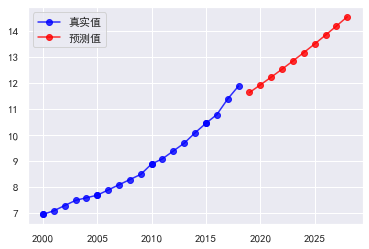

In [200]:
''' 多元回归预测老龄化 '''
from sklearn import linear_model
X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values
gm = GM()
X_pred = []
N = 10 # 未来年数
for i in range(3):
    gm.fit(X[:, i])
    X_pred.append(gm.predict(N))
X_pred = np.array(X_pred).T


rgf = linear_model.LinearRegression().fit(X, y)
print(rgf.intercept_)
print(rgf.coef_)
y_pred = rgf.predict(X_pred)     

display('2000-2018老龄化系数(%): ', np.round(y, 4))
display('2019-2029老龄化系数预测(%): ', np.round(y_pred, 4))

XX1 = data.iloc[:, 0].values
XX2 = np.arange(N) + 2019
plt.plot(XX1, y, '-o', color='blue', label='真实值', alpha=0.8)
X_pred = np.arange(N + 2018)
plt.plot(XX2, y_pred, '-o', color='red', label='预测值', alpha=0.8)
plt.legend()
plt.show()



# Appendix

In [196]:
'''pyechars 版本'''
df = res[0]
c = (
EffectScatter()
.add_xaxis([str(x) for x in df['年份']])
.add_yaxis("残差", np.round(df['残差'], 4))
.set_global_opts(title_opts=opts.TitleOpts(title=df.columns[1+i]))
)
c.render_notebook()

In [151]:
'''pyechars 版本'''
from pyecharts import options as opts
from pyecharts.charts import EffectScatter
from pyecharts.faker import Faker


i = 2
N = len(X_test) + 5 # 预测年分数
x = np.arange(N) + 2013
gm.fit(X_test[:, i])
y = gm.predict(N)

x_ = np.arange(len(X_test)) + 2013
y_ = X_test[:, i]

c = (
    EffectScatter()
    .add_xaxis([str(i) for i in x])
    .add_yaxis("预测值", np.round(y, 4))
    .add_xaxis([str(i) for i in x_])
    .add_yaxis("真实值", np.round(y_, 4))
    .set_global_opts(title_opts=opts.TitleOpts(title="预测效果"))
    
    
)
c.render_notebook()